In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

**Import Ecommerce Customers Dataset**

In [3]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [4]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Exploratory Data Analysis**


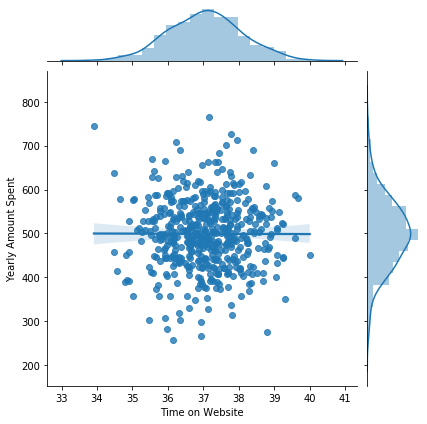

In [6]:
sns.jointplot(x='Time on Website',y='Yearly Amount Spent',data=df,kind='reg')

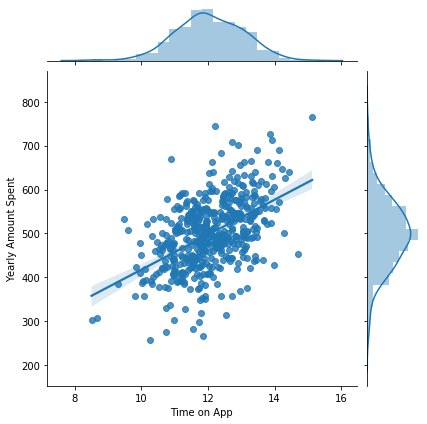

In [7]:
sns.jointplot(x='Time on App',y='Yearly Amount Spent',data=df,kind='reg')

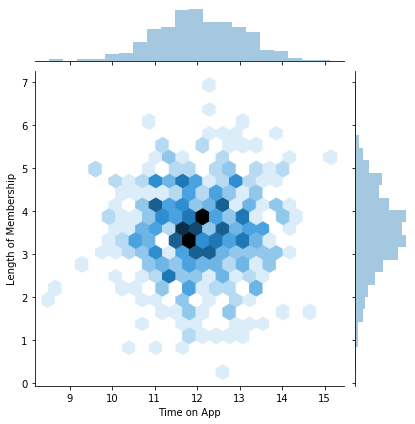

In [8]:
sns.jointplot(x='Time on App',y='Length of Membership',data=df,kind='hex')

**Using [pairplot] to explore types of relationships across the entire data set**

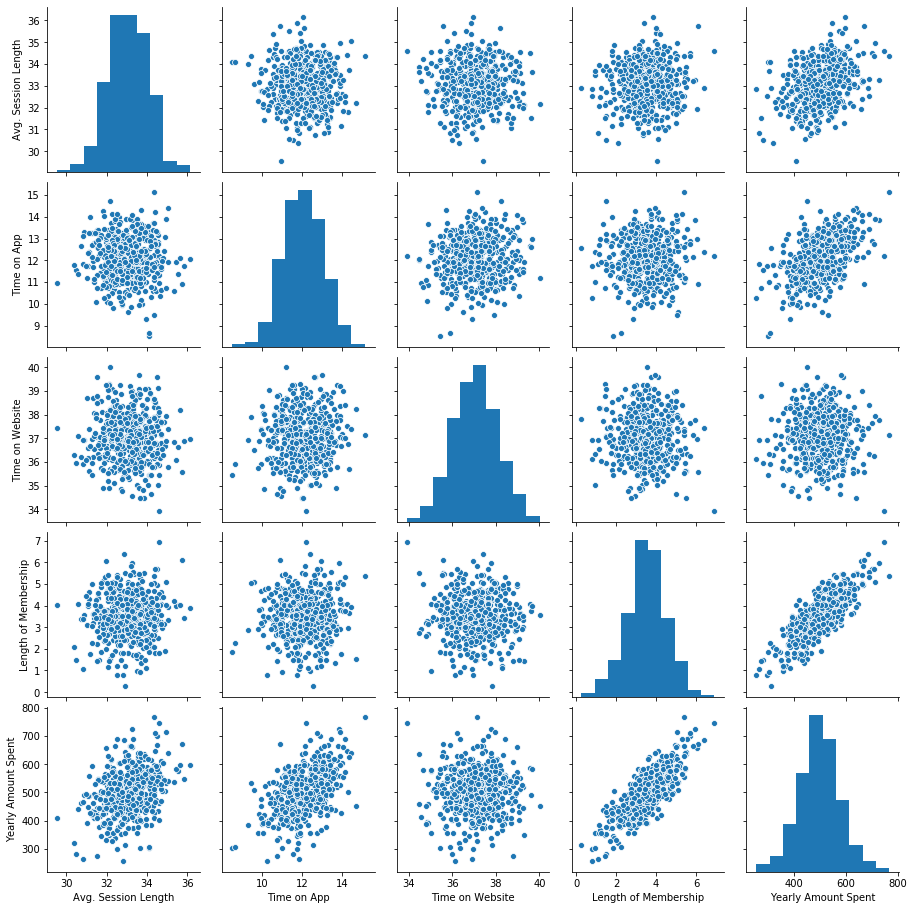

In [9]:
sns.pairplot(df)

It seems that Length of Membership is the most correlated feature with Yearly Amount Spent

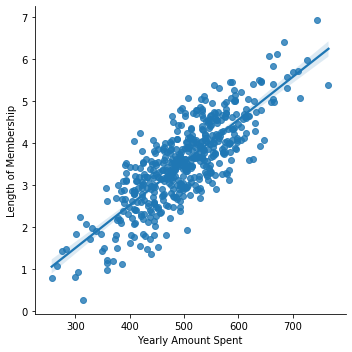

In [10]:
sns.lmplot(x='Yearly Amount Spent',y='Length of Membership',data=df)

## Training and Testing Data

Now that we've explored the data a bit, we split the data into training and testing sets.


**We set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column**

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X = df[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
y= df['Yearly Amount Spent']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state = 101)

## Training the Model

Now its time to train our model on our training data!

In [14]:
from sklearn.linear_model import LinearRegression

**Create an instance of a LinearRegression() model named lm.**

In [15]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [5]:
lm.fit(X_train,y_train)

NameError: name 'lm' is not defined

**Print out the coefficients of the model**

In [17]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns= ['Coefficients'])
coeff

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [18]:
predictions = lm.predict(X_test)

**A scatterplot of the real test values versus the predicted values can help to quickly evaluate the goodness of fit**

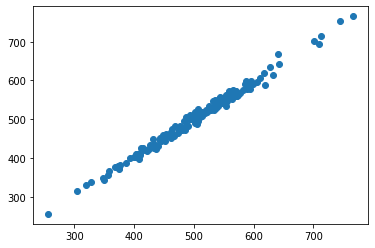

In [19]:
plt.scatter(y_test, predictions)

# Evaluating the Model

It's time to evaluate our model performance by calculating the residual sum of squares.

**We also calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [24]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, predictions)
r2

0.9890046246741234

In [26]:
#Mean Square Error
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(y_test,predictions))
print('Mean Squared Error', metrics.mean_squared_error(y_test,predictions))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean Absolute Error 7.228148653430828
Mean Squared Error 79.81305165097449
Root Mean Squared Error 8.933815066978635


## Residuals


**We plot a histogram of the residuals and make sure it looks normally distributed**

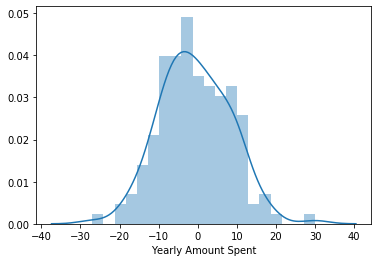

In [28]:
sns.distplot(y_test-predictions,bins = 20)

In [29]:
coeff = pd.DataFrame(lm.coef_,X.columns,columns= ['Coefficients'])
coeff

,Coefficients
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**It seems that ceteris paribus a unit increase in length of membership has the biggest effect on the amount spent**

**It also seems that the biggest amount spending comes from the app and length of membership so that would be a natural advice to invest on those.**